<a href="https://colab.research.google.com/github/marciusdm/dsnp/blob/main/projeto4/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Marcius D. Moraes](https://github.com/marciusdm)*  

---

# Detecção de Fraudes em Cartões de Crédito

## 1. Objetivos do projeto
Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## 2. Importando os Dados

Os dados que usaremos neste projeto foram obtidos através da plataforma [Kaggle](https://www.kaggle.com), que por sua vez se utilizou de dados fornecidos por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram em setembro de 2013 no período de dois dias, sendo que foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas e foram descaracterizadas, devido a aspectos legais ligados à confidencialidade dos dados em questão. Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Feitas estas considerações vamos pôr a mão na massa e tentar criar um modelo eficiente para detecção de fraudes a partir dos dados que temos em mão.


In [ ]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_fscore_support
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [ ]:
#instalando pacote scikit-plot 
!pip install scikit-plot -q

In [ ]:
import scikitplot as skplt

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# removendo as linhas de teste
df_train = df.drop(test.index)


# Verificando os conjuntos de teste, treino e original
print("Dimensões do conjunto original: ", df.shape)
print("Dimensões do conjunto de teste: ", test.shape)
print("Dimensões do conjunto de treino: ", df_train.shape)

print("Dimensões do Conjunto original", df.shape)

Dimensões do Conjunto original (284807, 31)


## 3. Análise Exploratória
### 3.1 Exibindo as primeiras entradas do dataset
Vamos primeiramente verificar as 5 primeiras entradas e os tipos de dados de suas colunas:



In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 3.2 Descobrindo os tipos de variáveis
O comando abaixo serve para mostrar os tipos de dados de cada uma das colunas do conjunto de dados:

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Como se pode notar todos os dados são numéricos. Vamos agora montar um dicionário de dados com informações fornecidas pelo site Kaggle.
### 3.3. Dicionário de dados
`Time`: Tempo decorrido em segundos entre a transação atual e a primeira transação do conjunto de dados;  
`Amount`: Valor da transação. A página descritiva do conjunto de dados no Kaggle não informa qual moeda está sendo utilizada, mas presume-se que seja o Euro tendo em vista que se trata de operações financeiras ocorridas na Europa;  
`Class`: Variável de resposta. Indica o tipo de transação quanto à sua legitimidade. Quando é `0`, trata-se de uma transação normal; se `1`, é uma transação fraudulenta.  
`V1` a `V28`: Colunas com valores numéricos resultantes de um processo de descaracterização dos dados originais com intuito de preservar informações confidenciais.

### 3.4 Resumo estatístico dos dados

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


De acordo com o site Kaggle, apenas as colunas `Time` e `Amount` não passaram pelo processo PCA.   
Como se pode notar, tal processo fez com que a média e a mediana dos dados das demais colunas ficassem próximas de zero. Além disso, o processo não deixa valores nulos como se pode notar pela execução do comando abaixo:

In [ ]:
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Nossa variável alvo é a `Class`. Quando seu valor é 1, indica que a transação é fraudulenta, e quando seu valor é 0, a transação é normal. Conforme informado na [descrição dos dados](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), apenas 0,17% dos dados são fraudulentos. Vamos plotar um histograma com a ocorrência das classes:

### 3.5. Verificando o balanceamento dos dados

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



[]

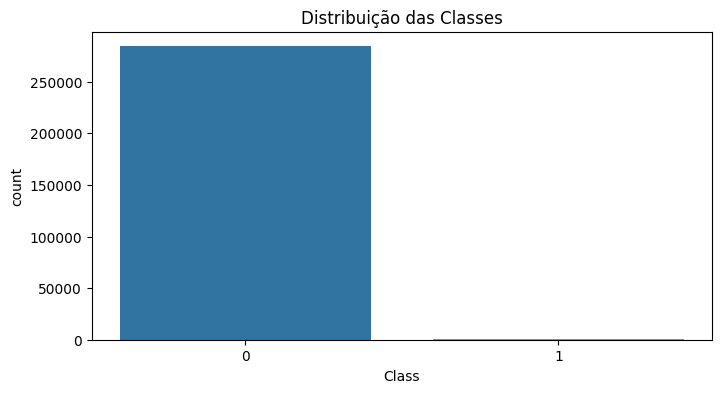

In [ ]:
# plotar gráfico de barras para as Classes
# ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

Como se pode notar, as fraudes representam uma porcentagem tão pequena que mal aparecem no gráfico acima. Isto significa que teremos de fazer um processo de balanceamento dos dados a fim de aumentar a precisão do nosso modelo de *machine learning*.
### 3.6 Estudando o comportamento das transações normais e das fraudulentas
Antes, porém, vamos verificar se existe alguma relação entre o valor e a legtimidade das transações, ou se existe algum horário mais propoenso a ocorrer transações fraudulentas. Para isto, iremos plotar histogramas para visualizarmos como é a distribuição dos valores das colunas `Time` e `Amount` quando a transação é normal e quando há fraude.

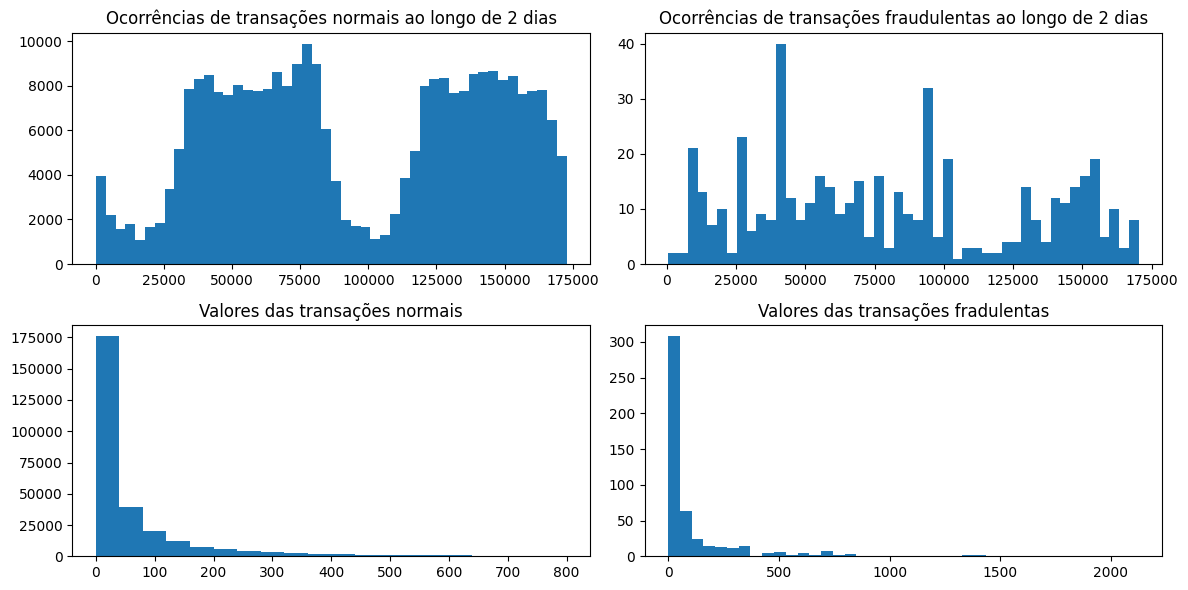

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
ax1.hist("Time",data=df[df.Class==0],bins=48)
ax1.set_title("Ocorrências de transações normais ao longo de 2 dias")
ax2.hist("Time",data=df[df.Class==1],bins=48)
ax2.set_title("Ocorrências de transações fraudulentas ao longo de 2 dias")
##eliminando outliers p/ melhor visualização do histograma de montante da transação
ax3.set_title("Valores das transações normais")
ax3.hist("Amount",data= df[(df.Class==0) & (df.Amount <=800.0)], bins=20) 
ax4.set_title("Valores das transações fradulentas")
ax4.hist("Amount",data= df[(df.Class==1) ], bins=40) #& (df.Amount <=200.0)
plt.tight_layout()



Observa-se um padrão bem definido no gráfico superior esquerdo, que diz respeito ao volume de transações consideradas normais quanto ao horário em que elas ocorrem. Não foi informado o horário da primeira transação nem se foi em um dia útil ou fim de semana. Provavelmente estas transações foram efetuadas em dois dias úteis, dado o padrão semelhante nas duas metades do gráfico. Além dissso, a primeira transação deve ter ocorrido por volta de meia-noite, quando o volume de transações cai, voltando a subir a partir da 6ª hora, já iniciando o dia. Quanto às transações ilegítimas, elas parecem acompanhar o de transações normais, porém isto não está tão nítido, talvez em função do pequeno número de ocorrências deste tipo.
Já quanto ao valor, a grande maioria delas se trata de pequenas compras, mesmo as operações fraudulentas. Vamos fazer uma comparação entre os valores entre ambos os tipos de transação plotando um diagrama de caixa (box-plot), que mostra as médias e os quartis.


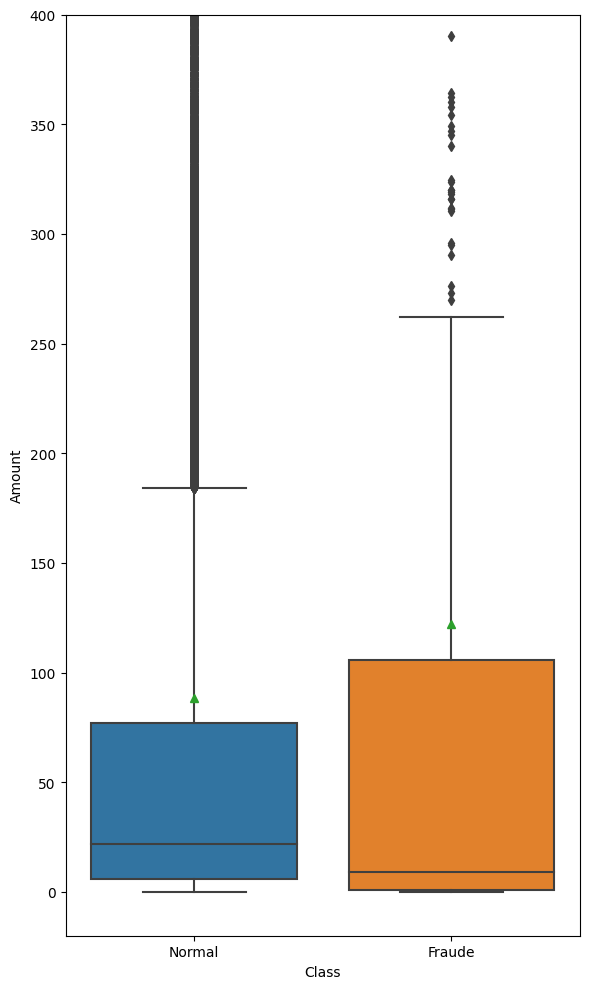

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

Percebe-se pelo gráfico acima que o valor médio para transações fraudulentas (indicado pelo ponto verde) é ligeiramente maior que a das transações normais, além disto, nestas útltimas os valores estão mais dispersos, mas isto pode ser causado pelo pequeno volume de fraudes se comparado às compras legítimas.  
### 3.7 Analisando as relações entre as variáveis.
Vamos agora verificar se existe alguma ligação entre as diferentes variáveis deste dataset, plotando uma matriz de correlação:



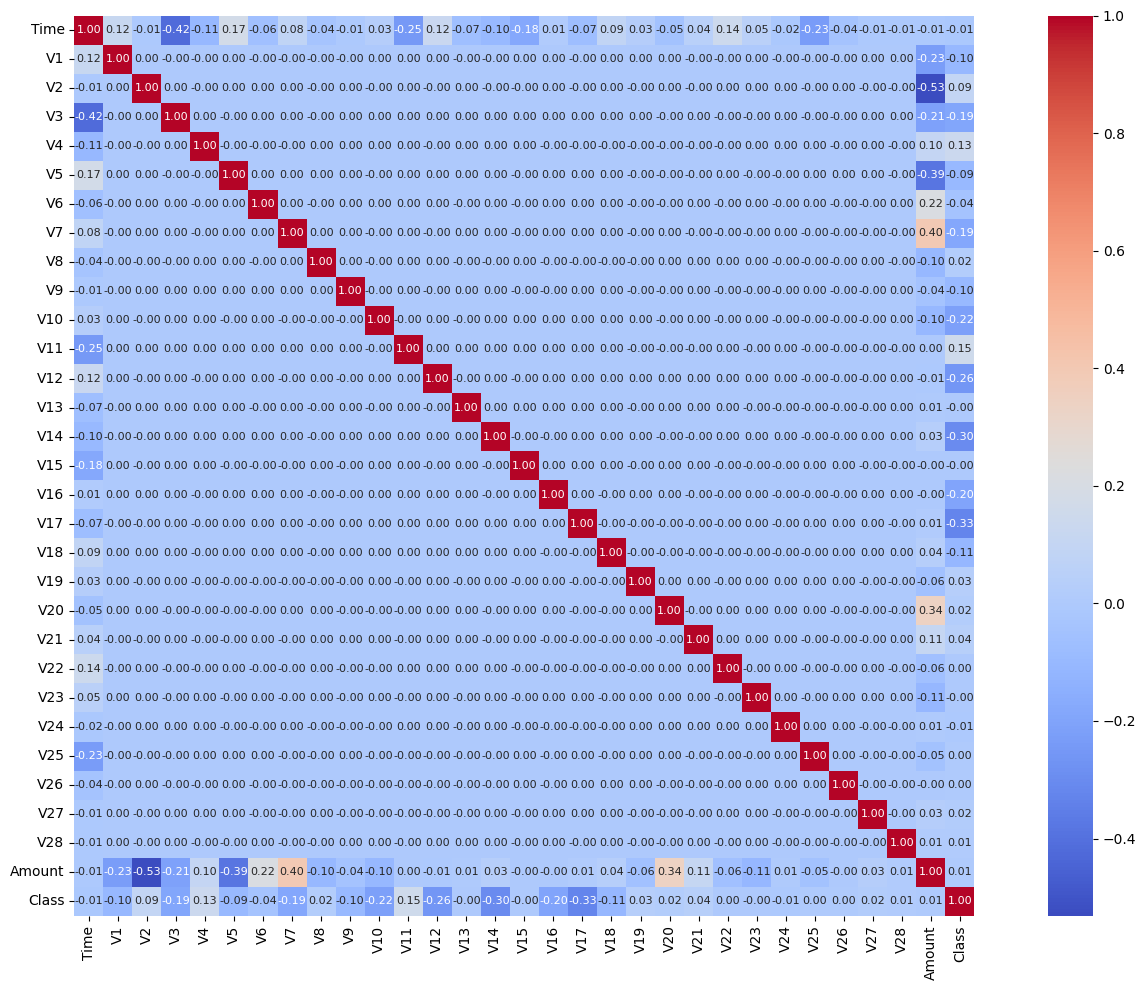

In [ ]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, fmt='.2f', square=True, linecolor='white', cmap='coolwarm', vmax=1.0, annot=True,annot_kws={'size':8.0});
plt.tight_layout()


O mapa de calor acima mostra que há pouca correlação entre as variáveis existente. Somente uma ligeira correlação negativa entre as variáveis `V2` e `Amount`. Vamos agora ver como se comportam as variáveis de `V1` a `V28` quando o valor de `Class` = 1 (fraude) e quando seu valor é 0 (normal). Para isso iremos plotar gráficos do tipo "[Estimativa de densidade kernel](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde)", que tentam estimar a Função densidade de probabilidade (FDP) de cada uma destas variáveis.  

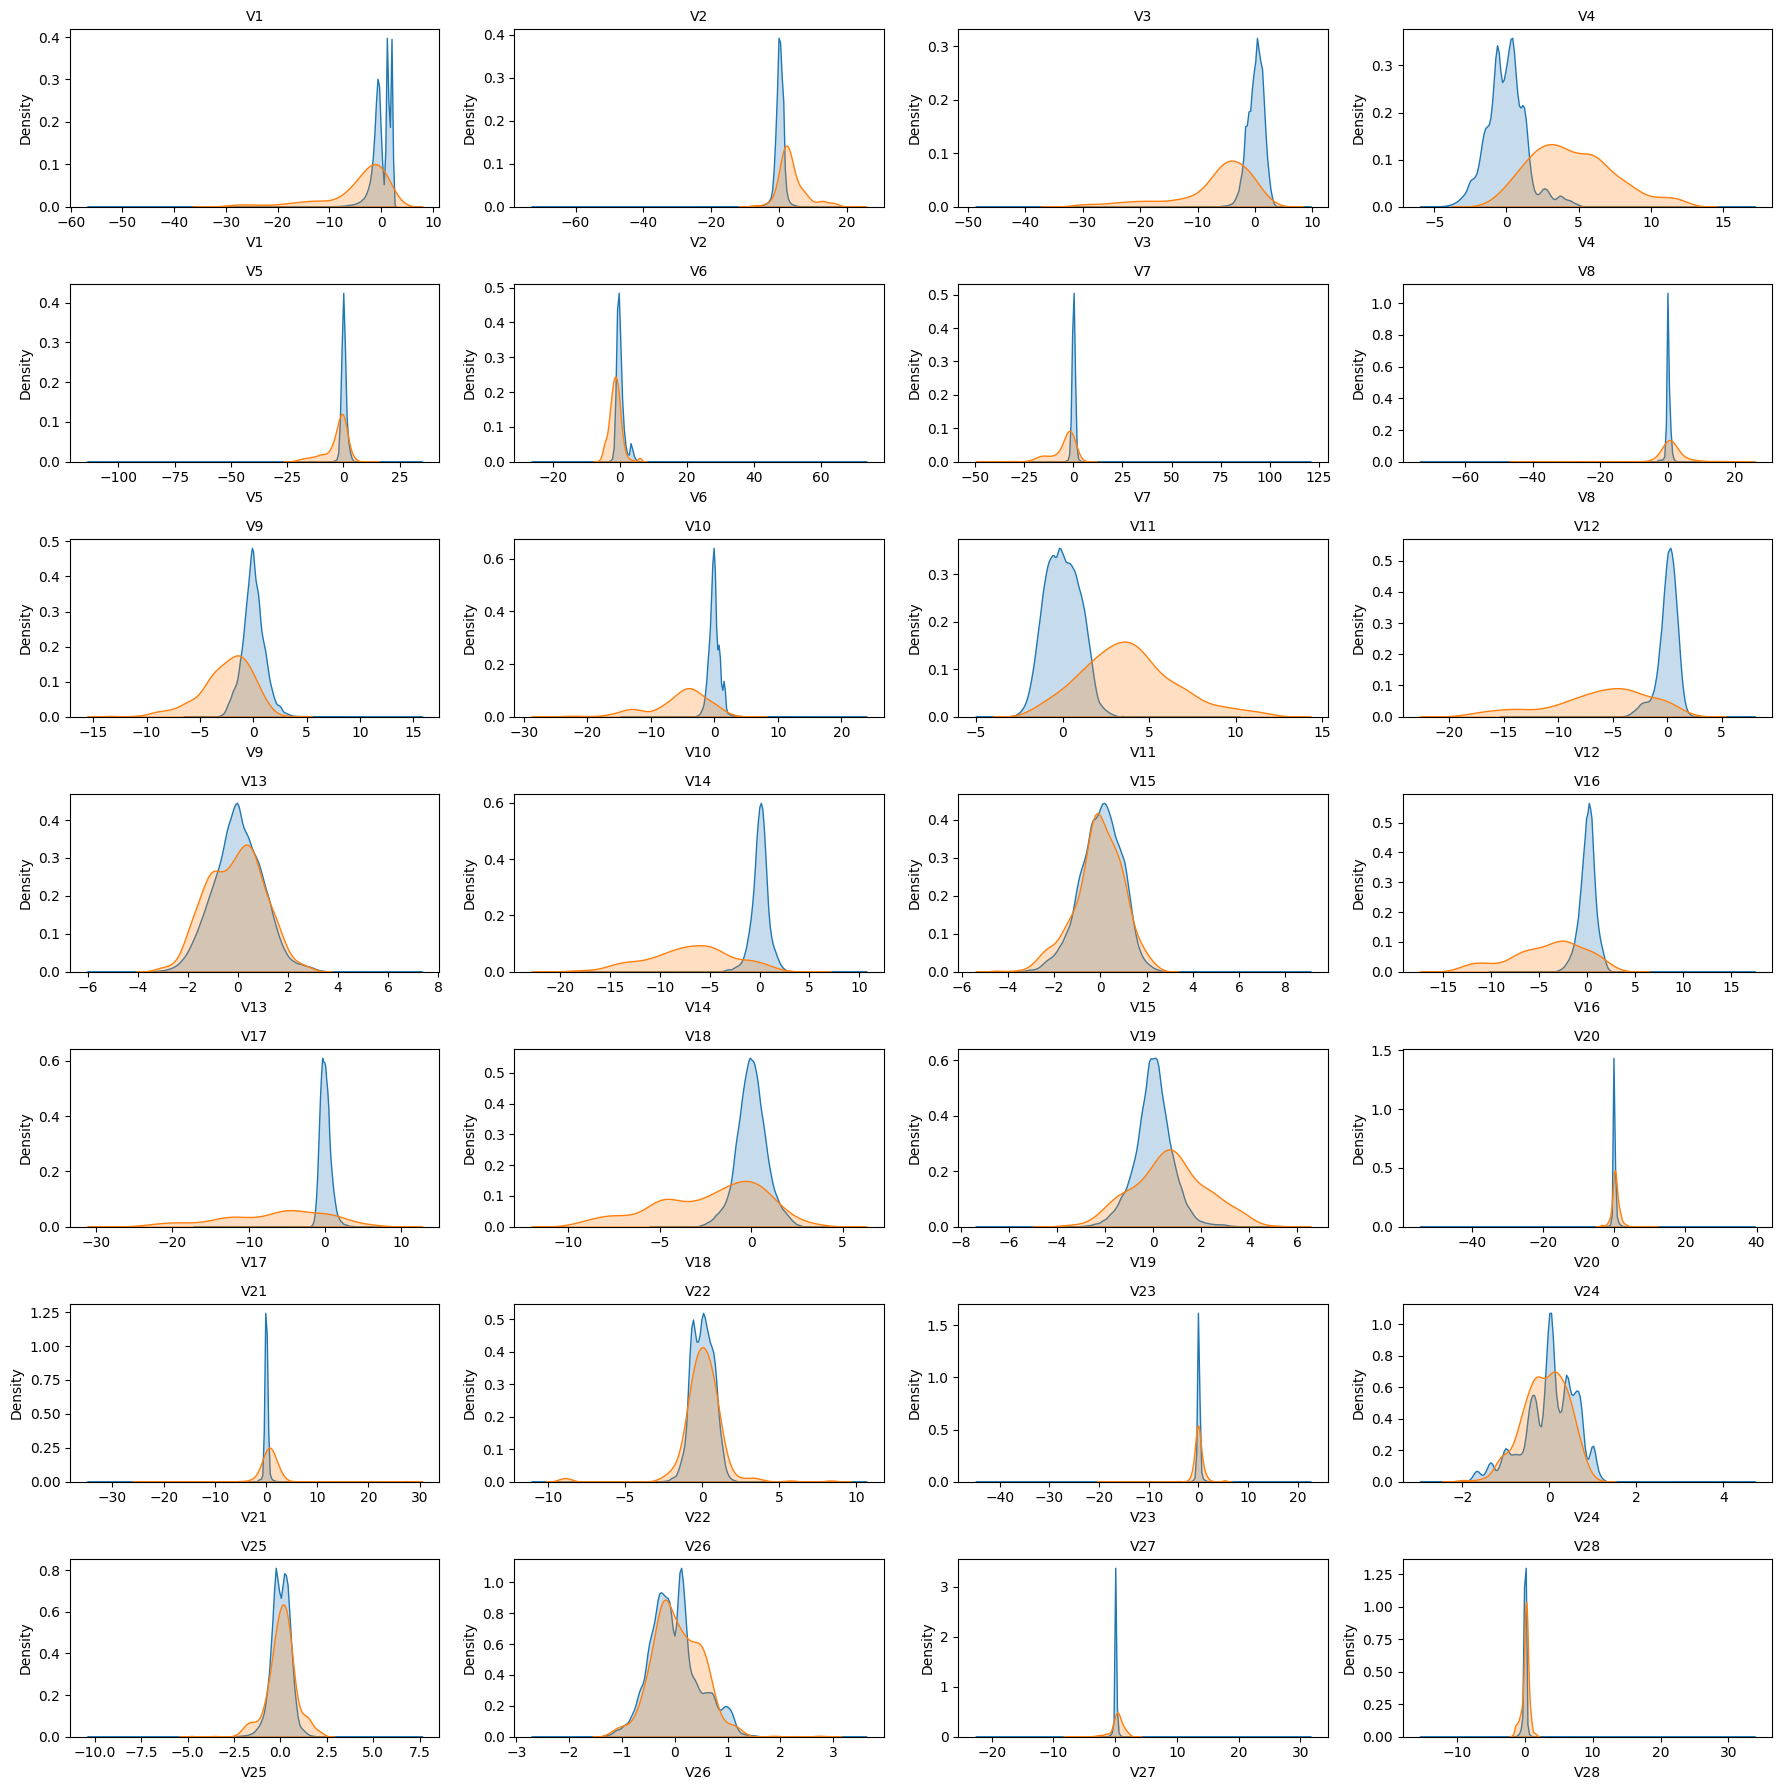

In [ ]:
#* Plotar uma matriz de correlação
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    #sns.kdeplot(df,x=col, hue="Class", fill=True)
    sns.kdeplot(df_class_0[col], label="Class 0", fill=True)
    sns.kdeplot(df_class_1[col], label="Class 1", fill=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


Na figura acima, as regiões em azul correspondem às transações normais e as regiões em laranja correspondem às fraudulentas. Note que algumas variáveis, como por exemplo, `V3`, `V4`, `V11` e `V14` apresentam um comportamento bem distinto de acordo com a classe de transação. Já variáveis como `V15`, `V22` e `V26` apresentam um comportamento similar.  
Já vimos que os dados estão bastante desbalanceados e que além disso as variáveis `Time` e `Amount` não estão padronizadas. Iremos tratar disso na etapa a seguir.

## 4. Preparação dos Dados
### 4.1 Padronização
Primeiramente vamos padronizar as colunas que não foram submetidas ao tratamento PCA. Este processo faz com que em cada coluna os valores passem a ter média 0 e desvio padrão 1. Para isso é utilizada a formula abaixo: 
\begin{align}
z=\frac{x-\mu}{\sigma} 
  \end{align}
Onde:  
*x*: valor atual da coluna  
$\mu$: média atual dos todos valores da coluna  
$\sigma$: desvio padrão atual dos valores da coluna  
A padronização  tem por objetivo melhorar as métricas de desempempenho dos modelos de machine learning. Mais detalhes podem ser vistos neste [artigo](https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12).  
Para fazer a padronização dos dados, utilizaremos a classe `StandardScaler`:



In [ ]:
# padronizar as colunas Time e Amount
df_clean = df_train.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


### 4.2 Divisão entre conjunto de treinamento e validação
Nesta etapa, iremos dividir os dados em dois grupos, o de treinamento e de validação, com o intuito de verificar se o processo de balanceamento, que será feito a seguir, foi adequado.

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df_train['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

### 4.3 Balanceamento
Agora, também com o objetivo de melhorar nossas medidas de desempenho, vamos fazer um balanceamento dos dados, tendo em vista que os dados fraudulentos representam uma porcentagem ínfima do total. Será utlizada uma técnica de *under-sampling*, que extrai um subconjunto aleatório da classe majoritária, preservando a minoritária.

0    313
1    313
Name: Class, dtype: int64


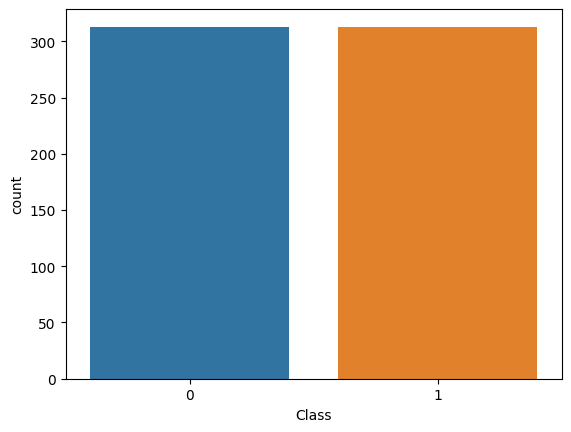

In [ ]:
# Usar a técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(y_rus.value_counts())

# plotar a nova distribuição de classes
sns.countplot(x=y_rus);

Com os dados balanceados, vamos verificar se existe alguma correlação entre as variáveis 

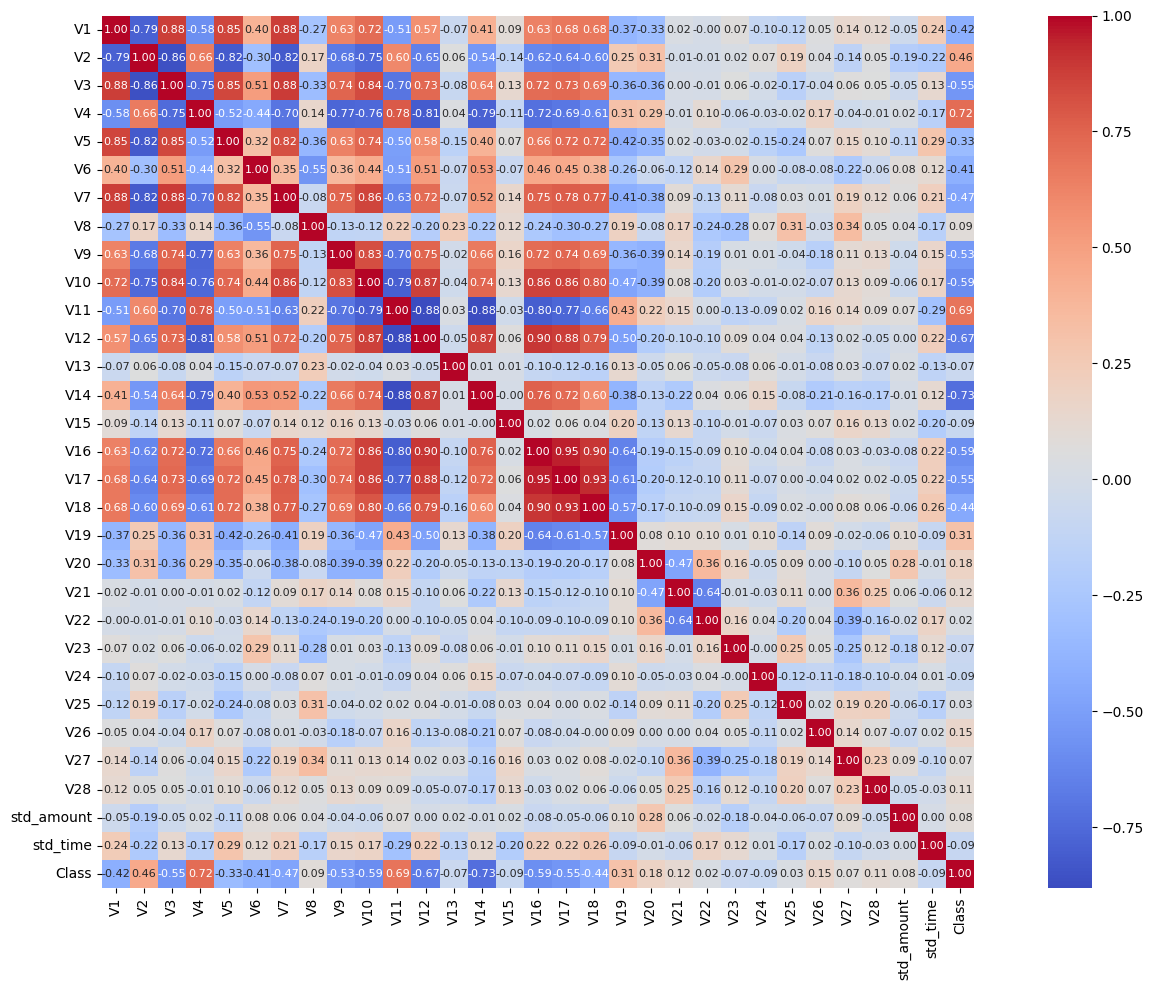

In [ ]:
# plotar a matriz de correlação
df_balanced = X_rus.copy()
df_balanced['Class']=y_rus
corr_rus = pd.DataFrame(df_balanced).corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_rus, fmt='.2f', square=True, linecolor='white', cmap='coolwarm', vmax=1.0, annot=True,annot_kws={'size':8.0});
plt.tight_layout()


Nota-se que, após o balanceamento, as variáveis de `V1` a `V18`, com exceção de `V8`,`V13` e `V15` apresentam uma correlação mais forte entre si e com a variável `Class`

## 5. Modelo de Machine Learning
### 5.1 Considerações iniciais
Ao executar o código que faz as previsões foi detectado que as medidas de desemepnho variam de uma execução para outra, então, com o intuito de se obter resultados mais fidedignos, o código abaixo e o da seção 5.2 foi executado 10 vezes e se extraiu a mediana das métricas para estas 10 execuções e no final será mostrado um sumário com todos esses dados
### 5.2 Construindo o modelo
Com todos os dados preparados, vamos agora construir um modelo classificador baseado em regressão logística. Este modelo efetuará o treinamento em cima dos dados `X_rus` e `y_rus`. Em seguida, faremos as previsões em cima dos dados de teste.

In [ ]:
num_execucao = 1

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
#Este código foi executado 10 vezes
np.random.seed(2)
# Instanciar e escolher os hyperparameters
model = LogisticRegression(max_iter=300)
# 4. Fit do modelo (treinar)
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de validação
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Quando os dados estão desbalanceados, a acurácia não é uma boa medida de desempenho. Neste caso, a precisão, o *recall* e a área da curva [ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772) são medidas mais importantes.
### 5.3 Verificando seu desempenho
Observação: os dados abaixo se referem a da última execução do modelo de machine learning.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9689    0.9841     60417
           1     0.0490    0.9238    0.0931       105

    accuracy                         0.9688     60522
   macro avg     0.5245    0.9463    0.5386     60522
weighted avg     0.9982    0.9688    0.9826     60522

Acurácia: 0.9688
AUC: 0.9463

Acurácia	Precisão	Recall	F1-score	AUC
0.9688		0.0490		0.9238	0.0931		0.9463

Total de registros positivos: 105
Total de registros negativos: 60417
Execução no. 10


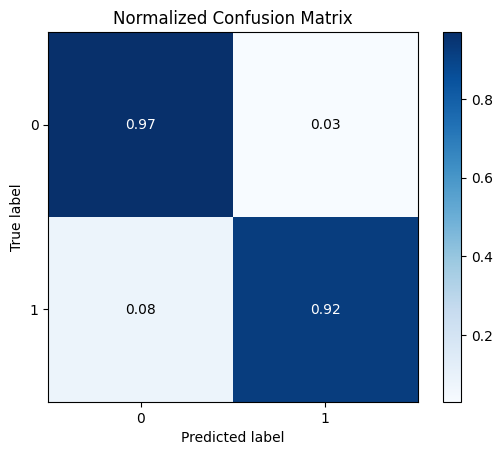

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))
precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos:", support[0])
print("Execução no.", num_execucao)

O modelo acima, na média acertou 89% de todas as transações fraudulentas, porém faz muitas previsões positivas incorretamente. Isso se reflete na baixíssima precisão do modelo (menos que 5%).  

Resultado final:  
Acurácia: 96,5%. Precisão: 4,5%. Recall: 90,7%. F1-score: 0,085. AUC: 0,937 

### 5.4 Fazendo Previsões no Conjunto de Teste
No início deste projeto, separamos parte dos dados p/ teste. Posteriormente subdividimos os dados remanescentes em dados de treino e validação. Agora chegou a hora de testar a eficiência do nosso modelo de *machine learning* sobre os dados de teste iniciais. Porém, antes disso, precisamos fazer a normalização dos dados de teste, assim como foi feita com os demais dados:

In [ ]:
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora basta separar os dados em X e Y e fazer as previsões:

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

Vamos agora visualizar os resultados

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9692    0.9843     42647
           1     0.0499    0.9324    0.0948        74

    accuracy                         0.9691     42721
   macro avg     0.5249    0.9508    0.5395     42721
weighted avg     0.9982    0.9691    0.9828     42721

Acurácia: 0.9691
AUC: 0.9508

Acurácia	Precisão	Recall	F1-score	AUC
0.9691		0.0499		0.9324	0.0948		0.9508

Total de registros positivos: 74
Total de registros negativos: 42647

Execução no. 10


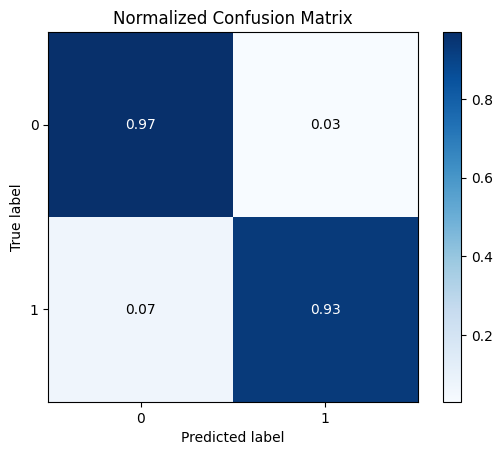

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_test_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))
print("Execução no.", num_execucao)

O modelo identificou corretamente 92% das transações fraudulentas, um desempenho ligeiramente superior ao obtido quando o modelo foi aplicado sobre os dados de validação.  

Resultado final:  
Acurácia: 96,5%. Precisão: 4,5%. Recall: 92,6%. F1-score: 0,086. AUC: 0,949

## 6. Usando outros modelos de *machine learning*.
Vamos agora comparar o modelo de regressão logística com outros técnicas de aprendizado de máquina. Nós iremos utilizar os métodos Naive Bayes, K-vizinhos mais próximos e árvore de decisão. Da mesma forma que foi feito com o modelo de regerssão logística, iremos rodar cada modelo 10 vezes e a seguir extrair um resumo.
### 6.1 Naive Bayes
Vamos agora fazer um teste utilizando um modelo de previsão do tipo **Naive Bayes**

In [ ]:
# instanciar e treinar um modelo de Naive Bayes
gnb = GaussianNB()
# 4. Fit do modelo (treinar)
gnb.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de validação
y_pred = gnb.predict(X_val)
y_proba = gnb.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9663    0.9828     60417
           1     0.0446    0.9048    0.0850       105

    accuracy                         0.9662     60522
   macro avg     0.5222    0.9355    0.5339     60522
weighted avg     0.9982    0.9662    0.9812     60522

Acurácia: 0.9662
AUC: 0.9355

Acurácia	Precisão	Recall	F1-score	AUC
0.9662		0.0446		0.9048	0.0850		0.9355

Total de registros positivos: 105
Total de registros negativos: 60417

Execução no. 10


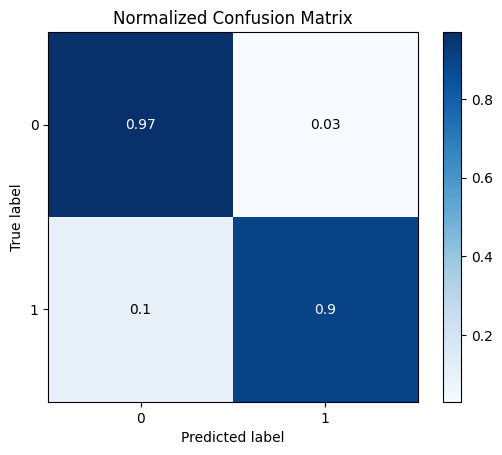

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))
print("Execução no.", num_execucao)

O modelo acima, usando a técnica de Naive Bayes, foi o que teve o desempenho mais baixo entre todos os modelos testados. Além disso, teve o mesmo problema de ter muitos falsos positivos, embora não tenha sido o que não se saiu pior nesse quesito.  

Resultado final:  
Acurácia: 96,9%. Precisão: 4,5%. Recall: 87,2%. F1-score: 0,087. AUC: 0,921
### 6.2 K-Nearest-Neighbours
Vamos agora usar um modelo de K-Nearest-Neighbours ou *K-viznhos mais próximos* na forma aportuguesada.

In [ ]:
clf = neighbors.KNeighborsClassifier(7, weights="distance")
clf.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de validação
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9794    0.9895     60417
           1     0.0723    0.9238    0.1342       105

    accuracy                         0.9793     60522
   macro avg     0.5361    0.9516    0.5618     60522
weighted avg     0.9983    0.9793    0.9880     60522

Acurácia: 0.9793
AUC: 0.9516

Acurácia	Precisão	Recall	F1-score	AUC
0.9793		0.0723		0.9238	0.1342		0.9516

Total de registros positivos: 105
Total de registros negativos: 60417

Execução no. 10


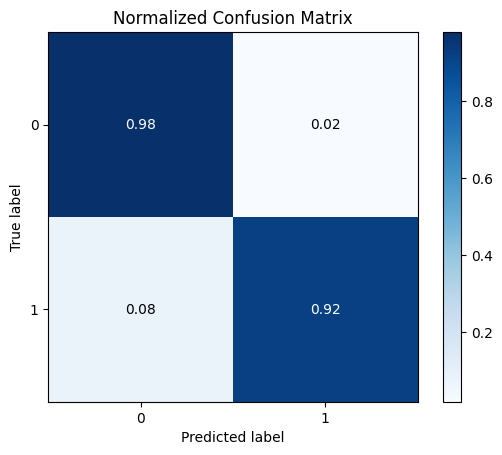

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))
print("Execução no.", num_execucao)

# <p align="justify">
No geral, este modelo foi o que teve a melhor acuráracia e a melhor precisão entre todos os modelos que utilizaram a técnica de under-sampling, porém sua capacidade de detectar corretamente fraudes, foi apenas um melhor que o modelo de Nayes, que é o que se saiu pior neste quesito.

**Resultado final:**  
Acurácia: 98,4%. Precisão: 8,5%. Recall: 88,2%. F1-score: 0,155. AUC: 0,932
</p>

###6.3 Árvore de decisão 
Por fim, iremos utilizar um modelo de árvore de decisão e avaliar seu desempenho.

In [ ]:
# 1. escolher e importar um modelo

# 2. Instanciar e escolher os hyperparameters
dtc = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dtc.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de validação
y_pred = dtc.predict(X_val)
y_proba = dtc.predict_proba(X_val)


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9512    0.9749     60417
           1     0.0322    0.9333    0.0622       105

    accuracy                         0.9512     60522
   macro avg     0.5160    0.9423    0.5186     60522
weighted avg     0.9982    0.9512    0.9734     60522

Acurácia: 0.9512
AUC: 0.9423

Acurácia	Precisão	Recall	F1-score	AUC
0.9512		0.0322		0.9333	0.0622		0.9423

Total de registros positivos: 105
Total de registros negativos: 60417

Execução no. 10


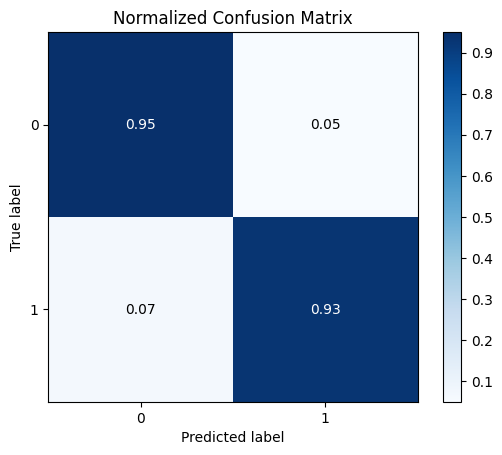

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
auc=roc_auc_score(y_val, y_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))
print("Execução no.", num_execucao)

Este foi o método que teve a mais baixa acurácia e a pior precisão (menos de 3%). No entanto, foi o que identificou corretamente resultados positivos (92,3%).  

**Resultado final:**   
Acurácia: 94,3%. Precisão: 2,9%. Recall: 92,2%. F1-score: 0,055. AUC: 0,923   

Até aqui todos os modelos empregados utilzaram um conjunto de dados que foi balanceado utilzando uma técnica de "under-sampling" que equilibra os dados removendo registros da classe majoritária.  
Agora iremos usar uma técnica chamada de "over-sampling", que cria registros fictícios da classe minoritária e iremos checar se com esta abordagem melhoramos as métricas de desempemho, especialmente a precisão, que foi sofrível em todos os modelos até aqui testados.  
Nós utilizaremos para efetuar o "over-sampling" um algoritmo chamado de SMOTE, que gera exemplos sintéticos da classe minoritária utilizando o método de  K-Nearest-Neighbours (vizinho mais próximo).

## 6.3 Regressão logística usando *over-sampling*
Primeiro vamos efetuar o balanceamento dos dados

0    181251
1    181251
Name: Class, dtype: int64


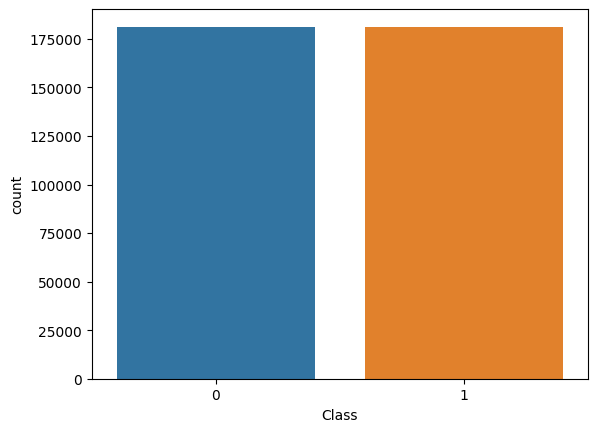

In [ ]:

# Instanciar o SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_smt, y_smt = smote.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(y_smt.value_counts())

# plotar a nova distribuição de classes
sns.countplot(x=y_smt);

In [ ]:
# Instanciar e escolher os hyperparameters
model_smt = LogisticRegression(max_iter=300)

# Dividir o dataset entre Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, stratify=y_smt, test_size=0.3, random_state=42)

# 4. Fit do modelo (treinar)
model_smt.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model_smt.predict(X_test)
y_proba = model_smt.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9166    0.9718    0.9434     54376
           1     0.9700    0.9115    0.9399     54375

    accuracy                         0.9417    108751
   macro avg     0.9433    0.9417    0.9416    108751
weighted avg     0.9433    0.9417    0.9416    108751

Acurácia: 0.9417
AUC: 0.9417

Acurácia	Precisão	Recall	F1-score	AUC
0.9417		0.9700		0.9115	0.9399		0.9417

Total de registros positivos: 54375
Total de registros negativos: 54376

Execução no. 10


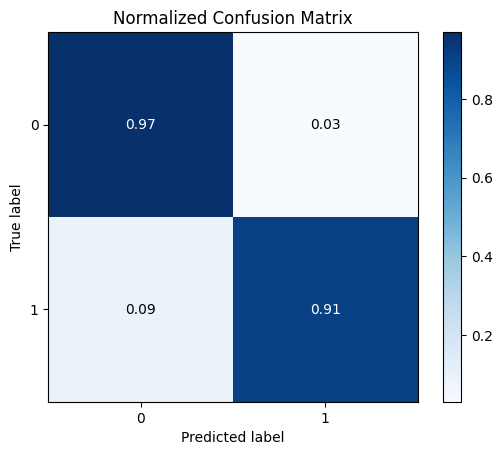

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc=roc_auc_score(y_test, y_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))
print("Execução no.", num_execucao)

A técnica de *over-sampling* reduziu bastante a incidência de falsos negativos, de modo que a precisão utilizando este modelo foi de 97% e o recall foi praticamente idêntico ao modelo de árvore de decisão (92,2%), ligeiramente superior ao modelo de regressão logística com *under-sampling* (90,8%).  

Resultado final:  
Acurácia: 94,6%. Precisão: 97,0%. Recall: 92,2%. F1-score: 0,945. AUC: 0,946

Feito isso, vamos testar nosso modelo no dado de teste original:

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_test_pred = model_smt.predict(X_test)


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9726    0.9860     42647
           1     0.0565    0.9459    0.1065        74

    accuracy                         0.9725     42721
   macro avg     0.5282    0.9593    0.5463     42721
weighted avg     0.9983    0.9725    0.9845     42721

Acurácia: 0.9725
AUC: 0.9593

Acurácia	Precisão	Recall	F1-score	AUC
0.9725		0.0565		0.9459	0.1065		0.9593

Total de registros positivos: 74
Total de registros negativos: 42647

Execução no. 10


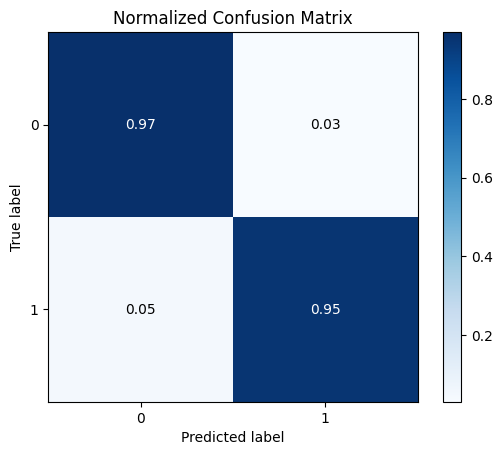

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_test_pred, digits=4))

precision,recall, f1, support = precision_recall_fscore_support(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
auc=roc_auc_score(y_test, y_test_pred)
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}".format(accuracy))
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(auc))
#tabela com resumo dos dados
print("Acurácia\tPrecisão\tRecall\tF1-score\tAUC")
print("{:.4f}\t\t{:.4f}\t\t{:.4f}\t{:.4f}\t\t{:.4f}\n".format(accuracy,precision[1], recall[1], f1[1], auc))
#print("Resumo:\n", precision_recall_fscore_support(y_val, y_pred))
print("Total de registros positivos:", support[1])
print("Total de registros negativos: {:}\n".format(support[0]))
print("Execução no.", num_execucao)
num_execucao+=1

Ao testar o modelo de ML com a técnica de regressão logista com *under-sampling*, a capacidade de acertar transações fraudulentas melhorou sensivelmente (94,6%), porém a precisão voltou a ficar ruim (menos de 6%).  

Resultado final:  
Acurácia: 97,3%. Precisão: 5,7%. Recall: 94,5%. F1-score: 0,108. AUC: 0,961

## 7. Comparativo entre os modelos de machine learning

Segue abaixo um comparativo resumido do desempenho dos modelos de machine learning utilizados neste projeto. Em vermelho estão os piores resultado de cada uma das medidas de desempenho utilizadas e em verde, as melhores, levando em conta apenas as previsões efetuadas nos dados de validação:

<img src="https://github.com/marciusdm/dsnp/blob/main/assets/projeto4/MetricaDesempenhoML.png?raw=true">

Quanto às previsões efetuadas nos dados de teste, quem se saiu melhor, por uma diferença pequena, foi o modelo de regerssão logística usando *over-sample*. Todos os índices de desempenho deste são superiores ao modelo de regressão que usa *under-sampling*

A planilha completa com os dados detalhadados das execuções pode ser encontrada [aqui](https://github.com/marciusdm/dsnp/raw/main/assets/projeto4/ComparativoProjetoMetodosML.xlsx).

## 8. Conclusões
No geral, não há grandes diferenças entre os métodos utilizados, quanto à capacidade de identificar corretamente fraudes. A diferença entre o melhor método (árvore de decisão) e o pior (Naive Bayes) é de apenas 5 pontos percentuais, e no geral, todos se sairam relativamente bem.   
O problema é que todos os métodos fazem muitas previsões positivas equivocadas, isso se reflete na precisão baixíssima. Apenas o modelo de regressão logística utlizando a técnica de *over-sampling* se saiu bem, porém apenas nos dados de validação, que sofreram balanceamento. Quando se aplicou o modelo nos dados de teste, que não haviam sido balanceados, o modelo também errou muitas previsões positivas.
Serão necessárias técnicas mais avançadas de machine-learning para reduzir a quantidade de falsos positivos.